# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [19]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [20]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [21]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components':[4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5) # 產生等比級數
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CVscore=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CVscore=0.908):
{'logistic__alpha': 0.0001, 'pca__n_components': 30}


In [22]:
np.logspace(-4, 4, 5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [23]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=30,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=100, n_iter_no_change=5, n_jobs=None,
                               penalty='l1', power_t=0.5, random_state=0,
                               shuffle=True, tol=1e-05, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [40]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081242,0.011695,0.000000,0.00000,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.728022,0.588398,0.704735,0.722689,0.656338,0.680036,0.052328,14
1,0.068750,0.007654,0.000000,0.00000,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.895604,0.856354,0.888579,0.904762,0.830986,0.875257,0.027493,12
2,0.096875,0.030300,0.003125,0.00625,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.920330,0.859116,0.896936,0.949580,0.878873,0.900967,0.031604,7
3,0.103125,0.007654,0.003125,0.00625,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.925824,0.853591,0.916435,0.963585,0.881690,0.908225,0.037765,1
4,0.121875,0.011692,0.000000,0.00000,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.853591,0.933148,0.946779,0.887324,0.905487,0.033149,4


In [42]:
best_clfs.head()

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,0.059375,0.006250,0.000000,0.00000,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.744505,0.709945,0.799443,0.781513,0.749296,0.756940,0.031087,13
10,8,0.062500,0.013976,0.000000,0.00000,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.898352,0.861878,0.894150,0.913165,0.836620,0.880833,0.027726,11
20,9,0.100000,0.015934,0.000000,0.00000,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.928571,0.875691,0.902507,0.946779,0.881690,0.907048,0.027161,3
30,3,0.103125,0.007654,0.003125,0.00625,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.925824,0.853591,0.916435,0.963585,0.881690,0.908225,0.037765,1
40,4,0.121875,0.011692,0.000000,0.00000,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.853591,0.933148,0.946779,0.887324,0.905487,0.033149,4


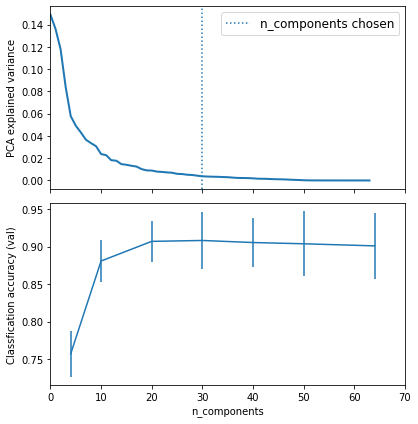

In [46]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6,6))

ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g:g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1) # yerr是那個直直的線啊
ax1.set_ylabel('Classfication accuracy (val)')
ax1.set_xlabel('n_components')
#避免兩個圖重疊，使用tight_layout分開
# lim控制顯示範圍
plt.xlim(0,70)
plt.tight_layout()
plt.show()